In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/My Drive/Colab Notebooks'

In [4]:
# Loading file from csv file to pandas dataframe
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
# As our most useful data are income and spending score. So, selecting the 'Annual Income' column and 'Spending Score' column
x = data.iloc[:,[3,4]].values # The indexes of Annual Income column - 3, Spending Score - 4

In [17]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [18]:
# Choosing the number of clusters - we choose the correct number of clusters using parameter known as 'WCSS' (Within Cluster Sum of Squares). Using this, we plot a graph known as 
# elbow graph
wcss = []
for i in range(1,11): # i.e 1 to 10
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # k-means++ is initiation method. 
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # inertia - sum of square all the clusters

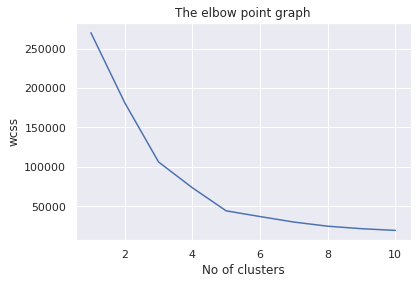

In [19]:
# Plotting the elbow graph to find which minimum cluster value
sns.set() # it will give basic parameters and parameters required for the graph
plt.plot(range(1,11), wcss) # range(1,11) - x, wcss - y
plt.title('The elbow point graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
# From the give plot, we can see that we have cutoff at cluster 3 and cluster 5, so we have 2 elbow points. Looking at the elbow point, we choose point 5 as our cluster value because 
# after that point there is no sharp significant drop.
# So, optimum no. of cluster = 5

In [21]:
# Training the k-means clustering model
# As we got that value of k i.e cluster = 5. We know that our optimum value of cluster is 5.

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y = kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


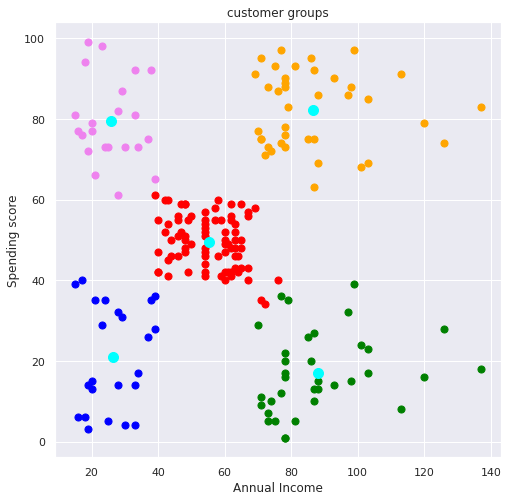

In [22]:
# Visualizing all the clusters
# Plotting the clusters and their centriods. There are 5 clusters  = 0,1,2,3,4
plt.figure(figsize=(8,8))

plt.scatter(x[y == 0,0], x[y ==0,1], s = 50, c = 'green', label = 'cluster 1')
plt.scatter(x[y == 1,0], x[y ==1,1], s = 50, c = 'red', label = 'cluster 2')
plt.scatter(x[y == 2,0], x[y ==2,1], s = 50, c = 'orange', label = 'cluster 3')
plt.scatter(x[y == 3,0], x[y ==3,1], s = 50, c = 'violet', label = 'cluster 4')
plt.scatter(x[y == 4,0], x[y ==4,1], s = 50, c = 'blue', label = 'cluster 5')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids') # s = size of dots, c = colors
plt.title('customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()